# 🏠 House Price Prediction Exercise Notebook

## 📌 Objective:
House price prediction is a problem in the real estate industry to make informed decisions. By using machine learning algorithms we can predict the price of a house based on various features such as location, size, number of bedrooms and other relevant factors. In this article we will explore how to build a machine learning model in Python to predict house prices to gain valuable insights into the housing market.

To tackle this issue we will build a machine learning model trained on the House Price Prediction Dataset. Use thee dataset provided in Slack. It includes 13 features:

![Screenshot 2025-05-11 at 11.26.26 PM.png](<attachment:Screenshot 2025-05-11 at 11.26.26 PM.png>)
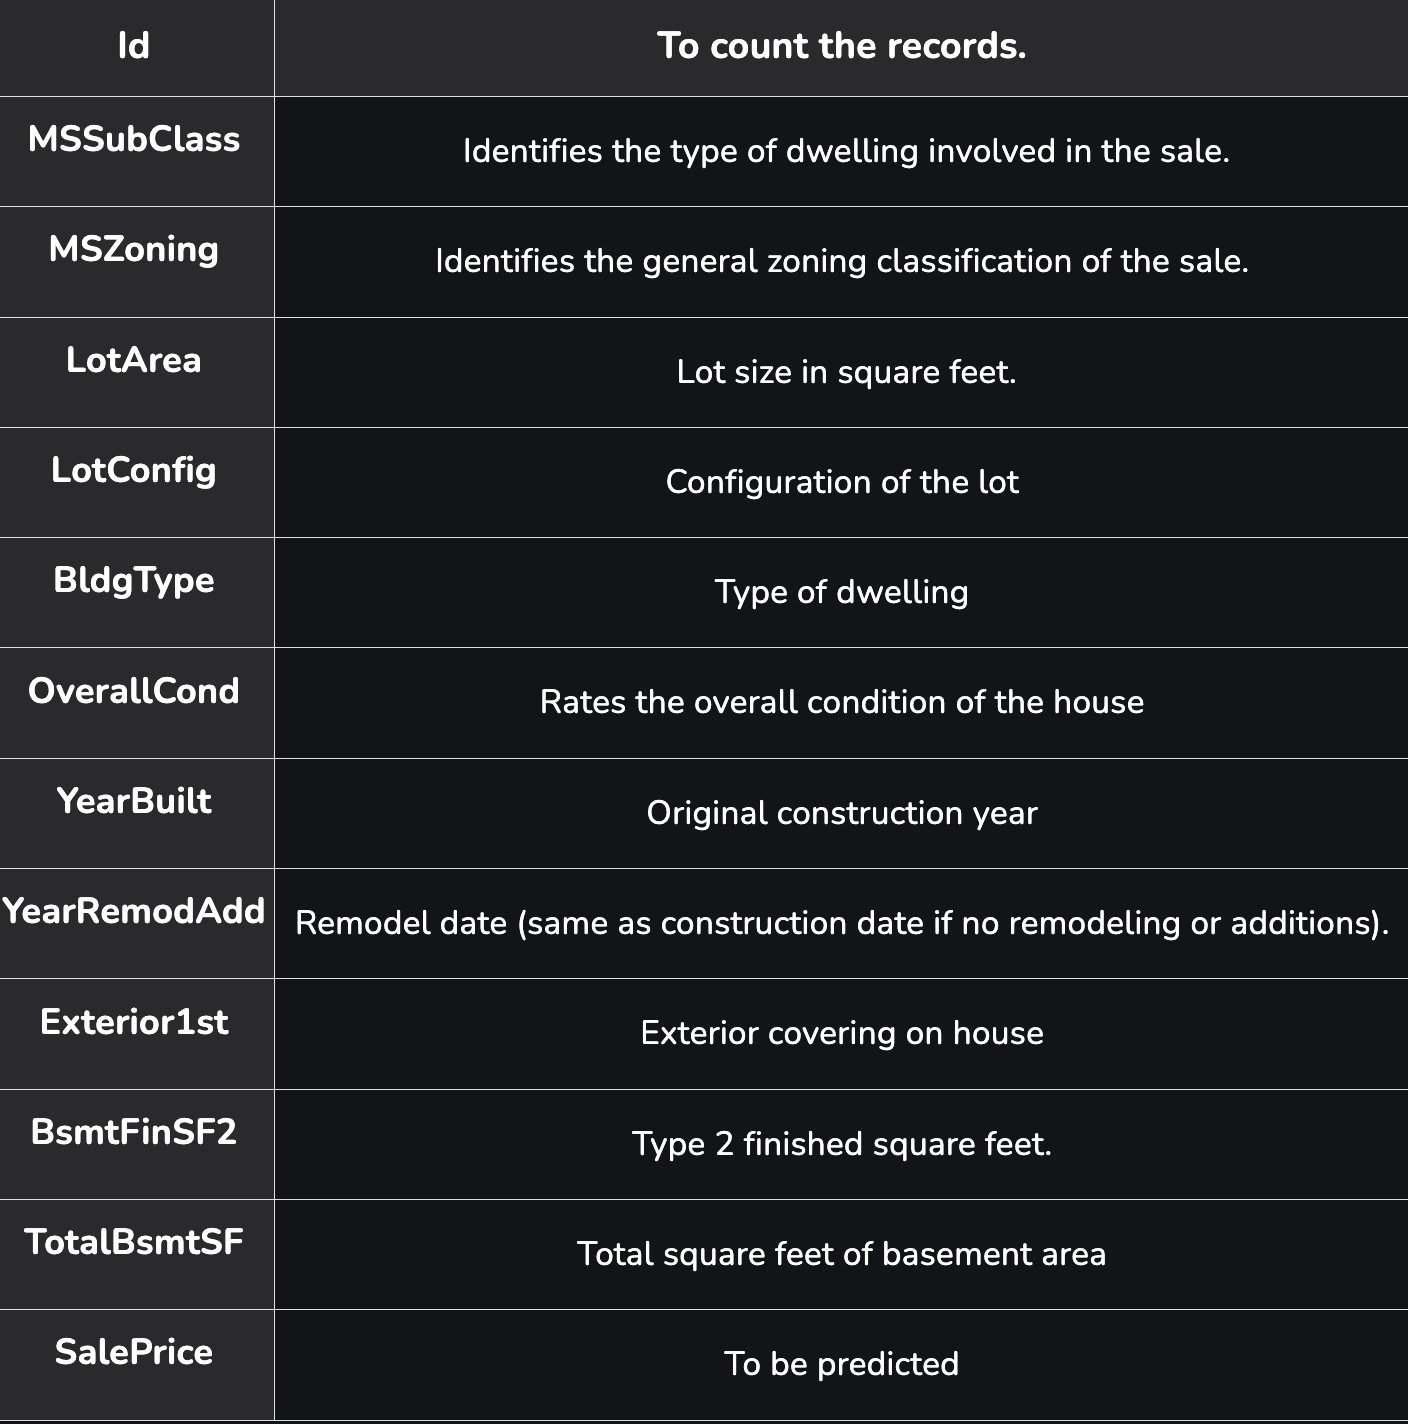

## Step 1: Import Libraries and Load Dataset

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# You need to download or place the dataset "HousePricePrediction.xlsx" in the same directory.
data = pd.read_excel("HousePricePrediction.xlsx")



In [48]:
# Display the first few rows
data.head()


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


## Step 2: Data Types Exploration

In [49]:
# Check data types of each column
data.info()

# Check for unique values in categorical columns (if any)
data.select_dtypes(include=['object']).nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


MSZoning        5
LotConfig       5
BldgType        5
Exterior1st    15
dtype: int64

## Step 3: Correlation Heatmap for Numerical Features

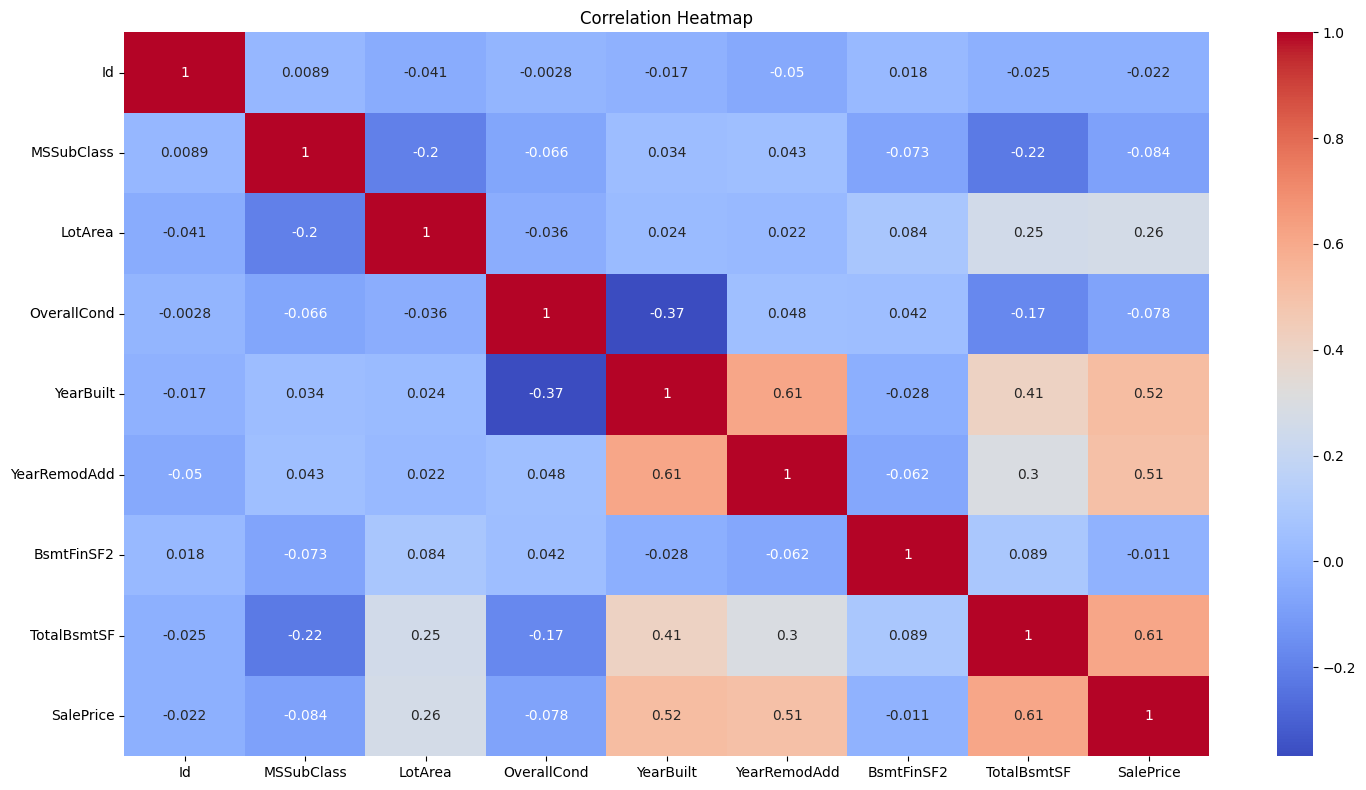

In [50]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## Step 4: Handle Missing Values

Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data. As in our dataset there are some columns that are not important and irrelevant for the model training. So we can drop that column before training.

In [51]:
# Check for missing values
print(data.isnull().sum())

# Drop rows or columns with too many missing values (if applicable)
# Example: Drop columns with more than 50% missing values
data = data.dropna(axis=1, thresh=len(data) * 0.5)

# Fill remaining missing values
# Fill numerical columns with their mean
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill categorical columns with their mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


## Step 5: Feature Selection

Hint:How can we convert categorical data into binary vectors (This maps the values to integer values).

In [52]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = data.select_dtypes(include='object').columns

# Encode categorical columns
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Alternatively, use one-hot encoding
data = pd.get_dummies(data, drop_first=True)


## Step 6: Model Training

look into what is mean_squared_error

In [53]:
# Define features (X) and target (y)
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Make predictions
y_pred = model.predict(X_test)

## Step 7: Evaluate the Model

Hint: use metrics that are specifc to regression algorithms 

In [56]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2453758317.97
R-squared: 0.33
